# Модель для l^2-нормы

In [1]:
import pylab as plt
import numpy as np
import math

## Параметры 

In [112]:
#количество агентов (избирателей)
number_of_agents = 40

# расстояние, на котором их мнения друг на друга влияют(бывшее epsilon)
dist_of_dependence = 0.45

# вес, с которым берется среднее мнений соседей (бывшее h)
weight = 0.1

# количество шагов алгоритма
num_of_steps = 100

# если изначальное распределение ступенчатое -- количество разных мнений (в начале)
num_of_diff_opinions = 4

In [113]:
def easy_ex(num, groups):
    examples = []
    for i in range(groups):
        examples.append(np.random.randint(-groups, groups + 1) / groups)
    result = []
    for i in range(num):
        result.append(np.random.choice(examples))
    return result
        

## Выбор изначального распределения и алгоритм

Норма перед нормировкой:  1.099999637148007
Количество шагов:  100
Мнения:  [-0.15858239791022044, -0.15858205274744386, -0.15858027612035763, -0.15858008690121012, -0.15857690665479185, -0.1585184617589884, -0.15850551846688615, -0.1584660523325706, -0.15846007772912407, -0.15840003491855253, -0.15830089813661039, -0.15823154138882986, -0.1582155561616422, -0.15820616339646104, -0.15818697828736417, -0.1581819593980946, -0.15814427564292136, -0.15812685272752447, -0.1581090578098396, -0.15808208754172087, -0.15807371673369566, -0.15805408912709087, -0.15804501200743576, -0.158008317190906, -0.1579997651087186, -0.15799971928443213, -0.15799791941322647, -0.1579849670085799, -0.15797353995344715, -0.15797010558542035, -0.15796240094442007, -0.15796097546678173, -0.15789571447630557, -0.1578751193229802, -0.15782164064704968, -0.15781923771417497, -0.15769083688251279, -0.15768743636108679, -0.15734446418674328, -0.15734108609423075]
Сумма мнений:  -6.324543299540395


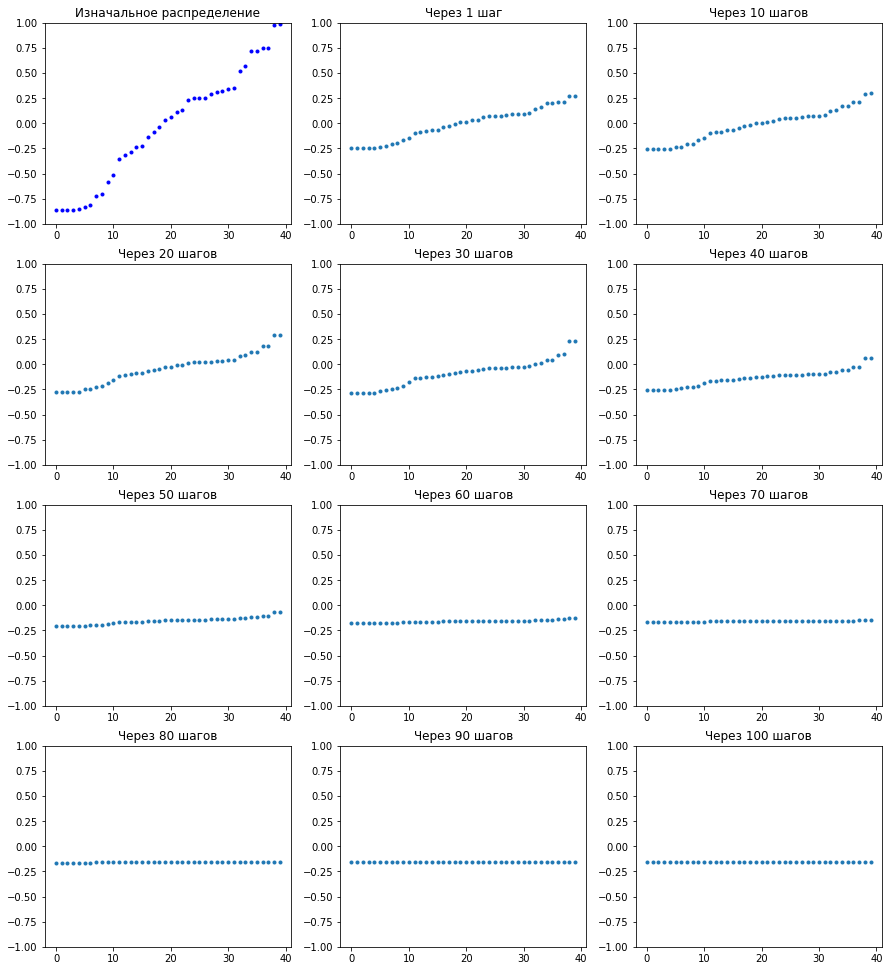

In [115]:
agents = []
Op = []
opinions = []
for i in range(number_of_agents):
    agents.append(i)
    
#    opinions.append(-0.25 + i / ((number_of_agents - 1) * 2))

# Для равномерно распределенных мнений:
    opinions.append(np.random.uniform(-1, 1))

#Для конкретного графика
#k = 2 / number_of_agents 
#for i in range(- number_of_agents // 2, number_of_agents // 2):
#    opinions.append(max(min(2 * (i * k) ** 3 + (i * k) ** 2, 1), -1))
    

# Чтобы ввести мнения вручную (важно ввести нужное количество мнений): 
#opinions = [0.15 for _ in range(number_of_agents // 4)] + [-0.15 for _ in range(number_of_agents // 4)] + [0 for _ in range(number_of_agents // 2)]

# Для ступенчатого распределения с num_of_diff_opinions вариантами
#opinions = easy_ex(number_of_agents, num_of_diff_opinions)

opinions.sort()
Op.append(opinions)

plt.figure(figsize = (15, 150))
plt.subplot(num_of_steps / 3 + 1, 3, 1)
plt.plot(agents, Op[0], 'b.')
plt.ylim(-1, 1)
plt.title('Изначальное распределение')

def new_situation(opin):
    neibours = []
    neibours.clear()
    for i in range(number_of_agents):
        neibours.append([])
        for j in range(number_of_agents):
            if (abs(opin[i] - opin[j]) <= dist_of_dependence):
                neibours[i].append(opin[j])

    new_opinions = []
    new_opinions.clear()
    for i in range(number_of_agents):
        new_opinion = opin[i] + (weight/len(neibours[i]))*sum(neibours[i])
        new_opinions.append(new_opinion)
    norm = 0
    for i in range(number_of_agents):
        norm += new_opinions[i]**2
    norm = math.sqrt(norm)
    for i in range(number_of_agents):
        new_opinions[i] /= norm
    return (new_opinions.copy(), norm)



for n in range(1, num_of_steps+1):
    sit = new_situation(Op[-1])
    Op.append(sit[0])
#    print('Шаг ' + str(n - 1) + ': ' + str(sit[-1]))
    if (n % 10 == 0 or n == 1):
        plt.subplot(num_of_steps / 3 + 1, 3, n / 10 + 2)
        plt.plot(agents, Op[-1], '.')
        plt.ylim(-1, 1)
        plt.title(('Через %d шагов' % n) if n > 1 else 'Через 1 шаг' )
    
print('Норма перед нормировкой: ', new_situation(Op[-1])[1])
print('Количество шагов: ', len(Op) - 1)
print('Мнения: ', Op[-1])
print('Сумма мнений: ', sum(Op[-1]))


    
#plt.plot(agents, Op[-1], 'b.')
#plt.ylim(-1, 1)

In [272]:
?np.random.randn

In [263]:
np.random.randn()

-0.5352789834423035